<a href="https://colab.research.google.com/github/Jabaananth/DS_TripFare-Predicting-Urban-Taxi-Fare/blob/main/trip_Fare_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAXI_TRIPFAR PROJECT

# IMPORT THE PAKAGE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read the file:

In [176]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/taxi_fare.csv')
r1,c1=data.shape
print(' the dataset has {} row and {} columns'.format(r1,c1))
data.head(6)

 the dataset has 212345 row and 18 columns


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

# treat the data types

In [178]:
data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime']=pd.to_datetime(data['tpep_dropoff_datetime'])

In [179]:
data['day_name'] = data['tpep_pickup_datetime'].dt.day_name()


In [180]:
data['year'].nunique()

KeyError: 'year'

In [181]:
import pandas as pd

# Ensure datetime column is properly typed
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# Assign date/time components
data = data.assign(
    hour=data.tpep_pickup_datetime.dt.hour,
    day=data.tpep_pickup_datetime.dt.day,
    month=data.tpep_pickup_datetime.dt.month,
    year=data.tpep_pickup_datetime.dt.year,
    days_of_week=data.tpep_pickup_datetime.dt.day_of_week
)


In [182]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,hour,day,month,year,days_of_week
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,2.05,0.00,0.3,12.35,Tuesday,0,1,3,2016,1
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,3.05,0.00,0.3,15.35,Tuesday,0,1,3,2016,1
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,8.00,0.00,0.3,63.80,Tuesday,0,1,3,2016,1
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,3.78,5.54,0.3,41.62,Tuesday,0,1,3,2016,1
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.00,15.50,0.3,113.80,Tuesday,0,1,3,2016,1


In [183]:
from math import *
from geopy.distance import great_circle as GRC

# formula --- a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)

def distance_transform(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
  travel_dist=[]

  for pos in range(len(pickup_longitude)):
    long1, lat1, long2, lat2 = map(radians,[
        pickup_longitude[pos],
        pickup_latitude[pos],
        dropoff_longitude[pos],
        dropoff_latitude[pos]
        ])

    dist_long= long2-long1
    dist_lati=lat2-lat1
    a=sin(dist_lati/2)**2+cos(lat1)*cos(lat2)*sin(dist_long/2)**2
    c=2*asin(sqrt(a))
    r=6371
    travel_dist.append(f"{c * r:.2f}")

  return travel_dist

data['travel_dist_KM']=distance_transform(
    data['pickup_longitude'].to_numpy(),
    data['pickup_latitude'].to_numpy(),
    data['dropoff_longitude'].to_numpy(),
    data['dropoff_latitude'].to_numpy()
    )

In [184]:
data['travel_dist_KM'] = data['travel_dist_KM'].astype(float)

In [185]:
for dist in data['travel_dist_KM'].head(5):
    print(f"{dist:.2f} km")

3.14 km
4.30 km
16.60 km
9.05 km
20.40 km


In [186]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'day_name',
       'hour', 'day', 'month', 'year', 'days_of_week', 'travel_dist_KM'],
      dtype='object')

In [187]:
data.drop(['VendorID','improvement_surcharge','tolls_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','RatecodeID','store_and_fwd_flag','payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount'], axis = 1, inplace=True)

In [188]:
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,day_name,hour,day,month,year,days_of_week,travel_dist_KM
0,1,-73.976746,40.765152,-74.004265,40.746128,12.35,Tuesday,0,1,3,2016,1,3.14
1,1,-73.983482,40.767925,-74.005943,40.733166,15.35,Tuesday,0,1,3,2016,1,4.30
2,2,-73.782021,40.644810,-73.974541,40.675770,63.80,Tuesday,0,1,3,2016,1,16.60
3,3,-73.863419,40.769814,-73.969650,40.757767,41.62,Tuesday,0,1,3,2016,1,9.05
4,5,-73.971741,40.792183,-74.177170,40.695053,113.80,Tuesday,0,1,3,2016,1,20.40


In [189]:
data[data['passenger_count'] == 0].drop('passenger_count', axis=1)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,day_name,hour,day,month,year,days_of_week,travel_dist_KM
13787,0.000000,0.000000,0.000000,0.000000,57.30,Thursday,8,10,3,2016,3,0.00
83120,-73.886902,40.673283,-73.891998,40.672520,35.30,Tuesday,2,1,3,2016,1,0.44
84183,-74.014091,40.706375,-74.014053,40.706364,21.30,Tuesday,2,1,3,2016,1,0.00
121599,-73.984421,40.739712,0.000000,0.000000,6.80,Tuesday,7,1,3,2016,1,8665.83
147430,-74.031792,40.727203,-74.031761,40.727173,122.30,Tuesday,8,1,3,2016,1,0.00
156148,-73.959137,40.801071,-73.959450,40.820477,0.30,Tuesday,9,1,3,2016,1,2.16
177486,-73.976395,40.748325,0.000000,0.000000,15.80,Tuesday,10,1,3,2016,1,8665.34
180349,-73.989105,40.753784,-74.031265,40.798759,60.95,Tuesday,10,1,3,2016,1,6.13
184075,-73.962883,40.766590,0.000000,0.000000,0.00,Tuesday,10,1,3,2016,1,8664.60


In [190]:
data[data['total_amount'] == 0].drop('total_amount', axis=1)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_name,hour,day,month,year,days_of_week,travel_dist_KM
354,5,-73.902107,40.764065,-73.902092,40.764122,Thursday,7,10,3,2016,3,0.01
1309,1,-73.901962,40.763931,-73.901970,40.763939,Thursday,7,10,3,2016,3,0.00
2560,1,-73.901932,40.763931,-73.901947,40.763924,Thursday,7,10,3,2016,3,0.00
4036,1,-73.901894,40.763950,-73.902077,40.763920,Thursday,7,10,3,2016,3,0.02
5196,6,0.000000,0.000000,-73.902077,40.763988,Thursday,7,10,3,2016,3,8659.51
5462,1,-73.901871,40.763981,-73.901909,40.763962,Thursday,7,10,3,2016,3,0.00
6465,1,-73.901894,40.763969,-73.901894,40.763969,Thursday,7,10,3,2016,3,0.00
7555,1,-73.902039,40.764019,-73.902092,40.763840,Thursday,7,10,3,2016,3,0.02
8415,1,-73.901993,40.764042,-73.902008,40.763893,Thursday,7,10,3,2016,3,0.02
10010,5,-73.901993,40.764149,-73.902008,40.764149,Thursday,8,10,3,2016,3,0.00


In [191]:
data[data['travel_dist_KM'] == 0].drop('travel_dist_KM', axis=1)


,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,day_name,hour,day,month,year,days_of_week
95,1,-74.651306,40.609261,-74.651306,40.609261,8.80,Tuesday,0,1,3,2016,1
116,1,0.000000,0.000000,0.000000,0.000000,16.62,Tuesday,0,1,3,2016,1
129,3,-73.793167,40.656830,-73.793167,40.656830,59.14,Tuesday,0,1,3,2016,1
365,2,0.000000,0.000000,0.000000,0.000000,44.64,Thursday,7,10,3,2016,3
478,1,0.000000,0.000000,0.000000,0.000000,98.16,Thursday,7,10,3,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...
212064,1,0.000000,0.000000,0.000000,0.000000,15.80,Tuesday,12,1,3,2016,1
212086,1,0.000000,0.000000,0.000000,0.000000,6.30,Tuesday,12,1,3,2016,1
212209,1,0.000000,0.000000,0.000000,0.000000,11.30,Tuesday,12,1,3,2016,1
212228,1,0.000000,0.000000,0.000000,0.000000,8.15,Tuesday,12,1,3,2016,1


In [192]:
(data['travel_dist_KM'] == 0).sum()

np.int64(3187)

In [193]:
(data == 0).drop(['passenger_count','total_amount','travel_dist_KM','pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude'], axis=1).sum()

,0
day_name,0
hour,7079
day,0
month,0
year,0
days_of_week,0


In [194]:
(data == 0).any()

,0
passenger_count,True
pickup_longitude,True
pickup_latitude,True
dropoff_longitude,True
dropoff_latitude,True
total_amount,True
day_name,False
hour,True
day,False
month,False


In [195]:
data.shape

(212345, 13)

In [196]:
data.isnull().sum()

,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
total_amount,0
day_name,0
hour,0
day,0
month,0


# encoding

In [197]:
le = LabelEncoder()

In [198]:
data['day_name_encoded'] = le.fit_transform(data['day_name'])

In [199]:
data = data.drop(columns=data.select_dtypes(include='object').columns)

In [200]:
data['year'].nunique()

1

In [201]:
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,hour,day,month,year,days_of_week,travel_dist_KM,day_name_encoded
0,1,-73.976746,40.765152,-74.004265,40.746128,12.35,0,1,3,2016,1,3.14,1
1,1,-73.983482,40.767925,-74.005943,40.733166,15.35,0,1,3,2016,1,4.30,1
2,2,-73.782021,40.644810,-73.974541,40.675770,63.80,0,1,3,2016,1,16.60,1
3,3,-73.863419,40.769814,-73.969650,40.757767,41.62,0,1,3,2016,1,9.05,1
4,5,-73.971741,40.792183,-74.177170,40.695053,113.80,0,1,3,2016,1,20.40,1


# outlier check

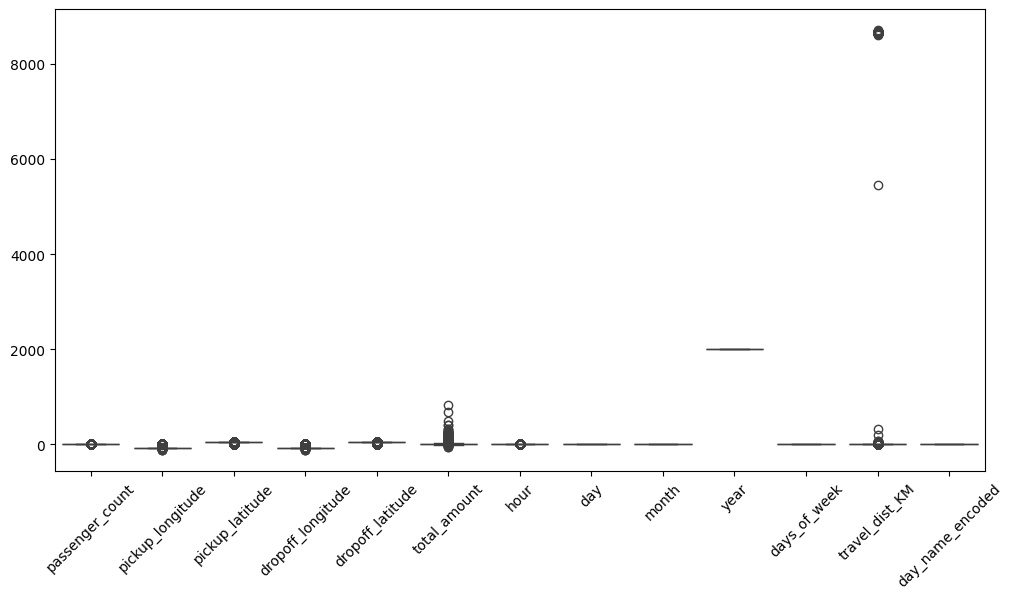

In [202]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.boxplot(data)
plt.show()

# StandardScaling

# trea the outlier

In [203]:
# StandardScaler

<Axes: >

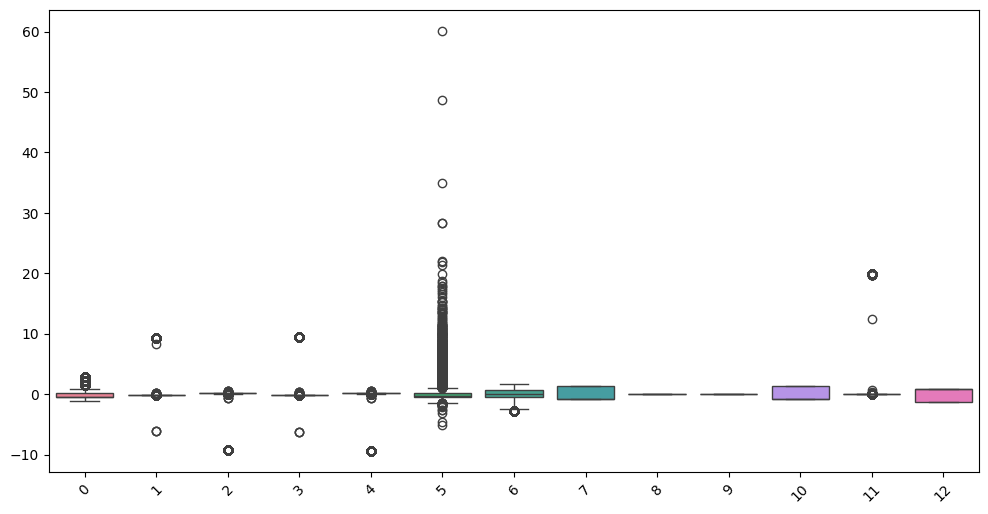

In [204]:
plt.figure(figsize=(12,6))
st=StandardScaler()
data=data.select_dtypes(exclude='datetime64[ns]')
plt.xticks(rotation=45)
sns.boxplot(st.fit_transform(data))

In [205]:
# this data outlier is high. so, we going to use data and without datetime

# statastics Analis

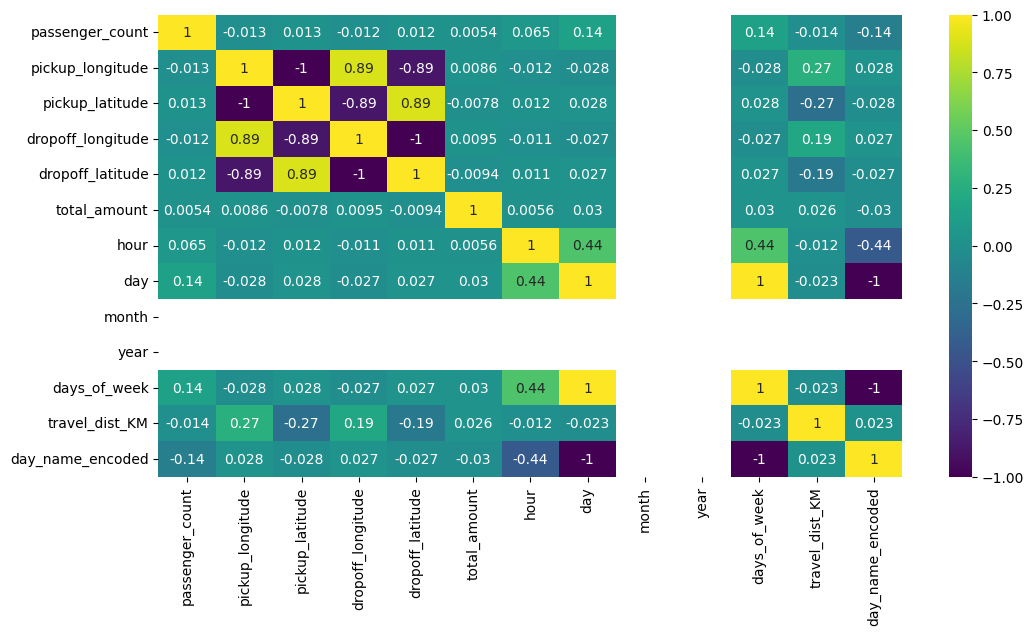

In [206]:
corr=data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()

In [207]:
# target is total_amount

In [ ]:
data=np.array(data)
plt.plot(data[0:300,11])

# Split the data

In [ ]:
val = data.drop('total_amount', axis=1)
tr = data['total_amount']
val_train, val_test, tr_train, tr_test = train_test_split(val, tr, test_size=0.2, random_state=42)

In [ ]:
val.values

array([[  1.        , -73.97674561,  40.76515198, ...,   0.        ,
          0.3       ,   1.        ],
       [  1.        , -73.98348236,  40.76792526, ...,   0.        ,
          0.3       ,   1.        ],
       [  2.        , -73.78202057,  40.64480972, ...,   0.        ,
          0.3       ,   1.        ],
       ...,
       [  1.        , -73.99117279,  40.73316956, ...,   0.        ,
          0.3       ,   1.        ],
       [  2.        , -73.9720993 ,  40.78644562, ...,   0.        ,
          0.3       ,   1.        ],
       [  1.        , -73.98876953,  40.71266174, ...,   0.        ,
          0.3       ,   1.        ]])

In [ ]:
tr.value_counts()

,count
total_amount,
7.30,5167
6.80,5076
7.80,4941
8.30,4931
6.30,4712
...,...
21.44,1
257.79,1
125.19,1


# LinearRegression

In [ ]:
# Training performance

In [ ]:
lin_reg_model= LinearRegression()
lin_reg_model.fit(val_train, tr_train)

LinearRegression()

In [ ]:
# Predict

In [ ]:
tr_pred = lin_reg_model.predict(val_train)
ts_pred = lin_reg_model.predict(val_test)

In [ ]:
# Testing performance

In [ ]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result = {
    "model_Name" : "lin_reg_model",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result)

{'model_Name': 'lin_reg_model', 'R2': 0.6690291021200706, 'MSE': 64.82570966393087, 'RMSE': np.float64(8.05144146497575), 'MAE': 4.348728671168077}


# Ridge Regression

In [ ]:
# Training performance

In [ ]:
from sklearn.linear_model import Ridge
Ridge=Ridge(alpha=0.1, max_iter=500)
Ridge.fit(val_train, tr_train)

Ridge(alpha=0.1, max_iter=500)

In [ ]:
# Testing performance

In [ ]:
tr_pred = Ridge.predict(val_train)
ts_pred = Ridge.predict(val_test)

In [ ]:
# Testing performance

In [ ]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result2 = {
    "model_Name" : "Ridge",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result2)

{'model_Name': 'Ridge', 'R2': 0.6690473950368654, 'MSE': 64.82212671654592, 'RMSE': np.float64(8.05121895842772), 'MAE': 4.34848791507203}


In [ ]:
# Hyperparameter tuning

In [ ]:
param_grid = {
    "alpha": [0.001, 0.0001, 0.1, 0.4, 0.95, 5, 6, 9, 100, 200, 300, 500],
    "max_iter": [50, 100, 300, 400, 600, 900, 1500, 5000]
}

grid_search = GridSearchCV(Ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(val_train, tr_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.1, max_iter=500), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.0001, 0.1, 0.4, 0.95, 5, 6, 9, 100,
                                   200, 300, 500],
                         'max_iter': [50, 100, 300, 400, 600, 900, 1500, 5000]},
             scoring='r2')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

Best Parameters: {'alpha': 0.0001, 'max_iter': 50}
Best R² Score (CV): 0.5661507762554733


In [ ]:
best_ridge = grid_search.best_estimator_
ts_pred = best_ridge.predict(val_test)

# Lasso Regression

In [ ]:
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(val_train, tr_train)

Lasso(alpha=0.5)

In [ ]:
# Testing performance

In [ ]:
tr_pred = lasso_model.predict(val_train)
ts_pred = lasso_model.predict(val_test)

In [ ]:
# Testing performance

In [ ]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result3 = {
    "model_Name" : "lasso_model",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result3)

{'model_Name': 'lasso_model', 'R2': 0.6496516707895772, 'MSE': 68.62107579886832, 'RMSE': np.float64(8.283783905852948), 'MAE': 4.571381704103349}


In [ ]:
# Hyperparameter tuning

In [ ]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [500, 1000, 3000]
}

grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(val_train, tr_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.994e+06, tolerance: 3.091e+03
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(alpha=0.5), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [500, 1000, 3000]},
             scoring='r2')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

Best Parameters: {'alpha': 0.0001, 'max_iter': 500}
Best R² Score (CV): 0.5669229667671931


In [ ]:
lasso_best_model = grid_search.best_estimator_
ts_pred = best_ridge.predict(val_test)

# Random Forest

In [ ]:
fs_model = RandomForestRegressor(n_estimators=500, random_state=60)
fs_model.fit(val_train, tr_train)

RandomForestRegressor(n_estimators=500, random_state=60)

In [ ]:
# Training performance

In [ ]:
tr_pred = fs_model.predict(val_train)
ts_pred = fs_model.predict(val_test)

In [ ]:
# Testing performance

In [ ]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result3 = {
    "model_Name" : "fs",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result3)

{'model_Name': 'fs', 'R2': 0.8722097890483622, 'MSE': 25.029666251951483, 'RMSE': np.float64(5.0029657456304335), 'MAE': 1.3564987030982156}


# Gradient Boosting

In [ ]:
gra_boot_model=GradientBoostingRegressor(n_estimators=100, random_state=42)
gra_boot_model.fit(val_train, tr_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Training performance

In [ ]:
tr_pred = gra_boot_model.predict(val_train)
ts_pred = gra_boot_model.predict(val_test)

In [ ]:
# Testing performance

In [ ]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result3 = {
    "model_Name" : "gra_boot_model",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result3)

{'model_Name': 'gra_boot_model', 'R2': 0.8316978158680622, 'MSE': 32.96455547671899, 'RMSE': np.float64(5.741476767933403), 'MAE': 2.8571482812643745}


In [ ]:
# Hyperparameter tuning

In [ ]:
val = data.drop('total_amount', axis=1)
tr = data['total_amount']
val_train, val_test, tr_train, tr_test = train_test_split(val, tr, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate model
gra_boot_model=GradientBoostingRegressor(n_estimators=100, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=gra_boot_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

# Fit the model
grid_search.fit(val_train, tr_train)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best R² Score (CV): 0.8889723134365025


In [ ]:
best_gra_boot_model = grid_search.best_estimator_
ts_pred = best_ridge.predict(val_test)

# Evaluate on Test Data

In [ ]:
best_model = grid_search.best_estimator_

# Predict on test set
test_predictions = best_model.predict(val_test)

# Evaluate
r2 = r2_score(tr_test, test_predictions)
mae = mean_absolute_error(tr_test, test_predictions)
mse = mean_squared_error(tr_test, test_predictions)
rmse = np.sqrt(mse)
result= {
    "model_Name" : "gra_boot_model",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

for key, value in result.items():
    print(f"{key}: {value}")


model_Name: gra_boot_model
R2: 0.8850324092870979
MSE: 22.518160068019018
RMSE: 4.745330343402767
MAE: 1.8986084381957635


In [ ]:
# Higher R² → Better fit

# Lower MSE, RMSE, MAE → Better accuracy

# Best_Model selection

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
best_model

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

# Training

In [ ]:
root_mean_squared_error( tr_test, ts_pred)

8.051441238437443

# coverting to Pickle format

In [ ]:
best_model = GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)
best_model.fit( val_train, tr_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [ ]:
print(tr_pred,"\n\n\n\n",ts_pred)

[ 9.12037409  9.92623072 47.36774177 ...  9.79152993 19.09260627
 67.47837213] 



 [14.58241482 12.65570849  9.91405162 ...  9.89334094 35.48382096
 11.9753412 ]


# Save the model using pickle

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/best_model_GBR.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("/content/drive/MyDrive/Colab Notebooks/Model saved as 'best_GBRe_model.pkl")

/content/drive/MyDrive/Colab Notebooks/Model saved as 'best_GBRe_model.pkl


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/best_model_GBR.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


tr_pred = loaded_model.predict(val_test)

In [ ]:
best_model=pd.DataFrame(best_model)
best_model.to_csv('/content/drive/MyDrive/Colab Notebooks/best_model_trip_fare.csv')

# streamlit

In [ ]:
!pip install streamlit streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
from math import radians, cos, sin, asin, sqrt

# Load the model
with open('/content/drive/MyDrive/Colab Notebooks/best_model_GBR.pkl', 'rb') as f:
    model = pickle.load(f)

# Haversine function to compute distance
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

def main():
    st.title("Urban Taxi Fare Prediction with ML")

    st.sidebar.header("Trip Details")

    # Date and Time input (separate inputs, then combine)
    pickup_date = st.date_input("Select Pickup Date", datetime.today())
    pickup_time = st.time_input("Select Pickup Time", datetime.now().time())
    pickup_datetime = datetime.combine(pickup_date, pickup_time)

    st.write("Pickup datetime:", pickup_datetime)

    # Inputs
    pickup_longitude = st.number_input("Pickup Longitude", -180.0, 180.0)
    pickup_latitude = st.number_input("Pickup Latitude", -90.0, 90.0)
    dropoff_longitude = st.number_input("Dropoff Longitude", -180.0, 180.0)
    dropoff_latitude = st.number_input("Dropoff Latitude", -90.0, 90.0)
    passenger_count = st.slider("Passenger Count", 1, 8)

    # Feature engineering
    hour = pickup_datetime.hour
    minute = pickup_datetime.minute
    day = pickup_datetime.day
    day_of_week = pickup_datetime.weekday()
    month = pickup_datetime.month
    year = pickup_datetime.year
    distance = haversine(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)

    features = [[pickup_longitude, pickup_latitude,
                 dropoff_longitude, dropoff_latitude,
                 passenger_count, hour, minute,
                 day_of_week, distance, month, year, day]]

    if st.button("Predict Fare"):
        result = model.predict(features)[0]
        st.success(f"Predicted Fare: ₹{result:.2f}")

# Run the app
if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.172.207.34


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.172.207.34:8501

⠼⠴⠦⠧⠇⠏⠋your url is: https://wild-pots-decide.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted 